# <center><b> `HCHO Gas Forcasting model - ARIMA`</b></center>

### `Importing libraries`


In [1]:
import pandas as pd


### `Load the datasets`

In [2]:
df_col_mat_nuw = pd.read_csv('Data Sets\col_mat_nuw_output.csv')
df_kan = pd.read_csv('Data Sets\kan_output.csv')
df_mon_kur_jaf = pd.read_csv('Data Sets\mon_kur_jaf_output.csv')

In [3]:
# Adding Column names
columns = ['HCHO Value','Location','Date','Next Date']
df_col_mat_nuw.columns = columns
df_kan.columns = columns
df_mon_kur_jaf.columns = columns

In [4]:
print(df_col_mat_nuw.head())
print(df_kan.head())
print(df_mon_kur_jaf.head())

   HCHO Value        Location        Date   Next Date
0    0.000263  Colombo Proper  2019-01-02  2019-01-03
1    0.000099  Colombo Proper  2019-01-03  2019-01-04
2    0.000210  Colombo Proper  2019-01-04  2019-01-05
3    0.000179  Colombo Proper  2019-01-05  2019-01-06
4    0.000108  Colombo Proper  2019-01-06  2019-01-07
   HCHO Value      Location        Date   Next Date
0    0.000092  Kandy Proper  2019-01-02  2019-01-03
1         NaN  Kandy Proper  2019-01-03  2019-01-04
2    0.000191  Kandy Proper  2019-01-04  2019-01-05
3    0.000122  Kandy Proper  2019-01-05  2019-01-06
4   -0.000065  Kandy Proper  2019-01-06  2019-01-07
   HCHO Value            Location        Date   Next Date
0    0.000019  Bibile, Monaragala  2019-01-02  2019-01-03
1    0.000028  Bibile, Monaragala  2019-01-03  2019-01-04
2    0.000037  Bibile, Monaragala  2019-01-04  2019-01-05
3   -0.000018  Bibile, Monaragala  2019-01-05  2019-01-06
4    0.000146  Bibile, Monaragala  2019-01-06  2019-01-07


In [5]:
#check the location values
print(df_col_mat_nuw['Location'].unique())
print(df_kan['Location'].unique())
print(df_mon_kur_jaf['Location'].unique())


['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper']
['Kandy Proper']
['Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


In [6]:
# check the data count for each location

location_counts = {
    'Colombo Proper': 0,
    'Deniyaya, Matara': 0,
    'Nuwara Eliya Proper': 0,
    'Kandy Proper': 0,
    'Bibile, Monaragala': 0,
    'Kurunegala Proper': 0,
    'Jaffna Proper': 0
}

for location in df_col_mat_nuw['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_kan['Location']:
    if location in location_counts:
        location_counts[location] += 1
for location in df_mon_kur_jaf['Location']:
    if location in location_counts:
        location_counts[location] += 1

for i in location_counts:
    print(i, location_counts[i])

Colombo Proper 1825
Deniyaya, Matara 1826
Nuwara Eliya Proper 1826
Kandy Proper 1825
Bibile, Monaragala 1825
Kurunegala Proper 1826
Jaffna Proper 1826


In [7]:
# Create separate dataframes for each location
colombo_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Colombo Proper']
Deniyaya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Deniyaya, Matara']
Nuwara_Eliya_df = df_col_mat_nuw[df_col_mat_nuw['Location'] == 'Nuwara Eliya Proper']
Kandy_df = df_kan[df_kan['Location'] == 'Kandy Proper']
Bibile_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Bibile, Monaragala']
Kurunegala_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Kurunegala Proper']
Jaffna_df = df_mon_kur_jaf[df_mon_kur_jaf['Location'] == 'Jaffna Proper']

In [8]:
# check for null values
print('Colombo\n',colombo_df.isnull().sum())
print('Deniyaya\n',Deniyaya_df.isnull().sum())
print('Nuwaraeliya\n',Nuwara_Eliya_df.isnull().sum())
print('Kandy\n',Kandy_df.isnull().sum())
print('Bibile\n',Bibile_df.isnull().sum())
print('Kurunegala\n',Kurunegala_df.isnull().sum())
print('Jaffna\n',Jaffna_df.isnull().sum())

Colombo
 HCHO Value    487
Location        0
Date            0
Next Date       0
dtype: int64
Deniyaya
 HCHO Value    847
Location        0
Date            0
Next Date       0
dtype: int64
Nuwaraeliya
 HCHO Value    1085
Location         0
Date             0
Next Date        0
dtype: int64
Kandy
 HCHO Value    793
Location        0
Date            0
Next Date       0
dtype: int64
Bibile
 HCHO Value    694
Location        0
Date            0
Next Date       0
dtype: int64
Kurunegala
 HCHO Value    592
Location        0
Date            0
Next Date       0
dtype: int64
Jaffna
 HCHO Value    365
Location        0
Date            0
Next Date       0
dtype: int64


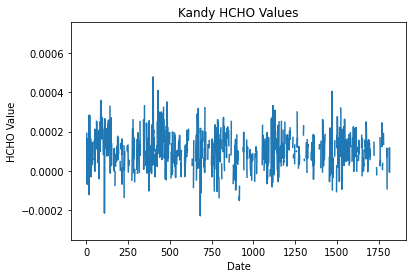

In [9]:
#plot the kandy HCHO values
import matplotlib.pyplot as plt
plt.plot(Kandy_df['HCHO Value'])
plt.xlabel('Date')
plt.ylabel('HCHO Value')
plt.title('Kandy HCHO Values')
plt.show()


In [10]:
Kandy_df.head()

,HCHO Value,Location,Date,Next Date
0,0.000092,Kandy Proper,2019-01-02,2019-01-03
1,NaN,Kandy Proper,2019-01-03,2019-01-04
2,0.000191,Kandy Proper,2019-01-04,2019-01-05
3,0.000122,Kandy Proper,2019-01-05,2019-01-06
4,-0.000065,Kandy Proper,2019-01-06,2019-01-07


In [11]:
Kandy_df['copy HCHO values'] = Kandy_df['HCHO Value']


In [12]:
Kandy_df.dtypes


HCHO Value          float64
Location             object
Date                 object
Next Date            object
copy HCHO values    float64
dtype: object

In [13]:
#droping Location, Next Date columns    
Kandy_df = Kandy_df.drop(['Location','Next Date'], axis=1)

In [14]:
Kandy_df.head()

,HCHO Value,Date,copy HCHO values
0,0.000092,2019-01-02,0.000092
1,NaN,2019-01-03,NaN
2,0.000191,2019-01-04,0.000191
3,0.000122,2019-01-05,0.000122
4,-0.000065,2019-01-06,-0.000065


In [15]:
Kandy_df.dtypes

HCHO Value          float64
Date                 object
copy HCHO values    float64
dtype: object

In [16]:
# Using interpolation to fill the missing values
Kandy_df['copy HCHO values'] = Kandy_df['copy HCHO values'].interpolate(method='linear')

In [17]:
#check for null values
print('Kandy\n',Kandy_df.isnull().sum())

Kandy
 HCHO Value          793
Date                  0
copy HCHO values      0
dtype: int64


## `Stationary Test`

In [24]:
# importing adfuller
from statsmodels.tsa.stattools import adfuller

def adfuller_test(HCHO):
    result=adfuller(HCHO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        


In [25]:
#checking the stationarity of the data
adfuller_test(Kandy_df['copy HCHO values'])

ADF Test Statistic : -8.392519109074408
p-value : 2.3458028638032573e-13
#Lags Used : 16
Number of Observations Used : 1808
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## `Diffrencing`

Since the data set is not stationary have to difffrence to make it statinary

<AxesSubplot:>

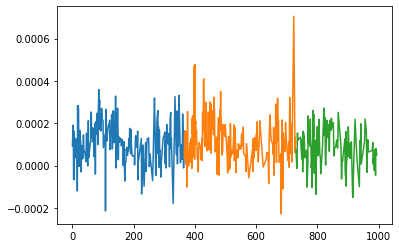

In [26]:
Kandy_df['copy HCHO values'][:365].plot()
Kandy_df['copy HCHO values'][365:730].plot()
Kandy_df['copy HCHO values'][730:995].plot()


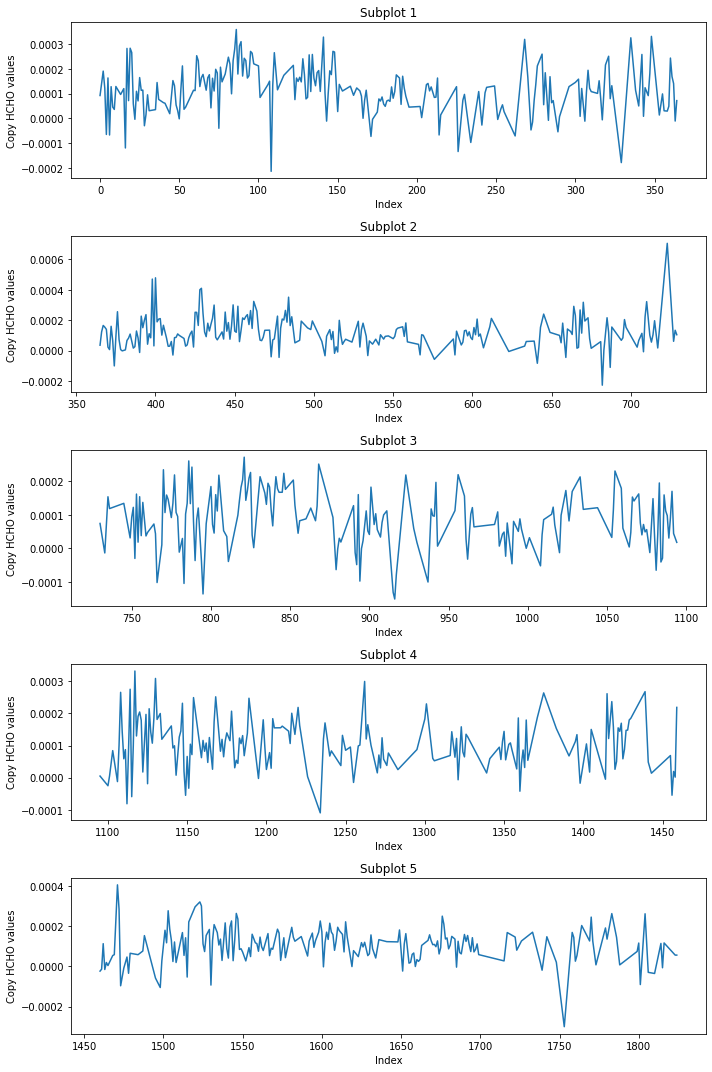

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(Kandy_df) // 365, ncols=1, figsize=(10, 15))

for i, ax in enumerate(axes):
    start_index = i * 365
    end_index = (i + 1) * 365
    data = Kandy_df['copy HCHO values'].iloc[start_index:end_index]
    ax.plot(data)
    ax.set_title(f"Subplot {i+1}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Copy HCHO values")

plt.tight_layout()
plt.show()


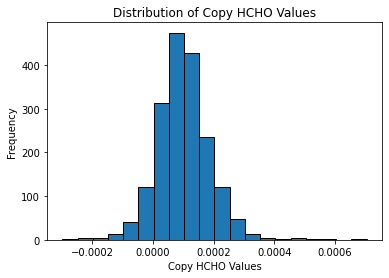

In [28]:
import matplotlib.pyplot as plt

# Assuming your copy HCHO values are stored in a variable called 'copy_hcho_values'
copy_hcho_values = Kandy_df['copy HCHO values']

# Plotting the distribution
plt.hist(copy_hcho_values, bins=20, edgecolor='black')
plt.xlabel('Copy HCHO Values')
plt.ylabel('Frequency')
plt.title('Distribution of Copy HCHO Values')
plt.show()


<AxesSubplot:ylabel='Density'>

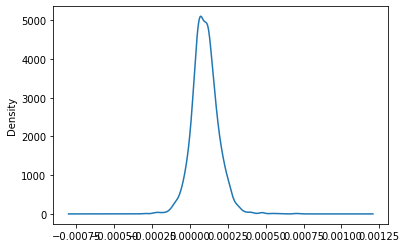

In [29]:
Kandy_df['copy HCHO values'].plot(kind='kde')

In [247]:
Kandy_df.dtypes

#set date as index
Kandy_df['Date'] = pd.to_datetime(Kandy_df['Date'])
Kandy_df.set_index('Date', inplace=True)
Kandy_df.head()

,HCHO Value,copy HCHO values,forecast
Date,,,
2019-01-02,0.000092,0.000092,NaN
2019-01-03,NaN,0.000142,NaN
2019-01-04,0.000191,0.000191,NaN
2019-01-05,0.000122,0.000122,NaN
2019-01-06,-0.000065,-0.000065,NaN


In [248]:
Kandy_df['copy HCHO values'].shape

(1825,)

In [168]:
order = (1, 1, 0)
todays_date = datetime.today().date()

# Fit ARIMA model
model = ARIMA(Kandy_df['copy HCHO values'], order=order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast for 7 days from today's date
forecast_steps = 7
forecast = results.predict(start =1500,end=1824)
forecast_values = forecast.predicted_mean
predictions = []
# Print the predicted exchange rates for the next 7 days
print("Predicted Exchange Rates for the Next 7 Days:")
for i in range(forecast_steps):
   prediction_date = todays_date + pd.Timedelta(days=i + 1)  # Adjust for starting from tomorrow
   print(f"{prediction_date}: {forecast_values.iloc[i]}")
   predictions.append(forecast_values.iloc[i])

                               SARIMAX Results                                
Dep. Variable:       copy HCHO values   No. Observations:                 1825
Model:                 ARIMA(1, 1, 0)   Log Likelihood               14791.179
Date:                Mon, 15 Apr 2024   AIC                         -29578.359
Time:                        18:55:07   BIC                         -29567.341
Sample:                             0   HQIC                        -29574.294
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2773   1.96e-19  -1.42e+18      0.000      -0.277      -0.277
sigma2       5.29e-09   1.17e-10     45.171      0.000    5.06e-09    5.52e-09
Ljung-Box (L1) (Q):                   3.96   Jarque-

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


AttributeError: 'Series' object has no attribute 'predicted_mean'

In [169]:
forecast

1500   -0.000010
1501    0.000082
1502    0.000158
1503    0.000134
1504    0.000232
          ...   
1820    0.000093
1821    0.000084
1822    0.000076
1823    0.000067
1824    0.000058
Name: predicted_mean, Length: 325, dtype: float64

In [170]:
Kandy_df['copy HCHO values'][1500:]

1500    0.000103
1501    0.000179
1502    0.000117
1503    0.000276
1504    0.000185
          ...   
1820    0.000082
1821    0.000073
1822    0.000065
1823    0.000056
1824    0.000056
Name: copy HCHO values, Length: 325, dtype: float64

TypeError: index type not supported

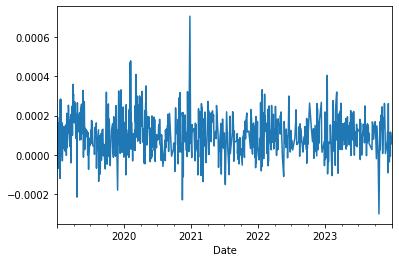

In [249]:
Kandy_df['copy HCHO values'].plot()
forecast.plot()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-pa

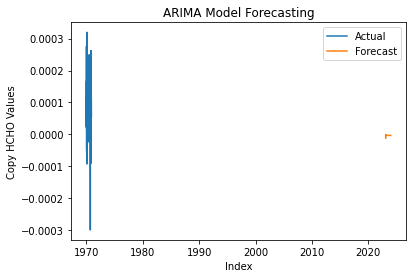

RMSE: 0.00013213463191072105
MAPE: 105.06541903326321
MAE: 0.00011517680204354995
R2 Score: -1.75346622160471
Adjusted R2 Score: -1.7705684962730621


In [250]:
# Arima model for Kandy_df['copy HCHO values']

from statsmodels.tsa.arima.model import ARIMA

# Splitting the data into training and testing sets
train = Kandy_df['copy HCHO values'][:1500]
test = Kandy_df['copy HCHO values'][1500:]

# Fitting the ARIMA model
model = ARIMA(train, order=(1, 1, 0))
model = model.fit()

# Forecasting the values
forecast = model.predict(start=1500,end=1824,dynamic=True)


# Plotting the results
plt.plot(test.values, label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Index')
plt.ylabel('Copy HCHO Values')
plt.title('ARIMA Model Forecasting')
plt.legend()
plt.show()

# Calculating the RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

# Calculating the MAPE
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(f'MAPE: {mape}')

# Calculating the MAE
mae = np.mean(np.abs(test - forecast))
print(f'MAE: {mae}')

# Calculating the R2 Score
from sklearn.metrics import r2_score

r2 = r2_score(test, forecast)
print(f'R2 Score: {r2}')

# Calculating the Adjusted R2 Score
n = len(test)
p = 2
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f'Adjusted R2 Score: {adj_r2}')

In [251]:
forecast

2023-02-10   -1.224343e-05
2023-02-11   -7.592825e-07
2023-02-12   -4.150444e-06
2023-02-13   -3.149066e-06
2023-02-14   -3.444764e-06
                  ...     
2023-12-27   -3.377353e-06
2023-12-28   -3.377353e-06
2023-12-29   -3.377353e-06
2023-12-30   -3.377353e-06
2023-12-31   -3.377353e-06
Freq: D, Name: predicted_mean, Length: 325, dtype: float64

In [252]:
test

Date
2023-02-10    0.000103
2023-02-11    0.000179
2023-02-12    0.000117
2023-02-13    0.000276
2023-02-14    0.000185
                ...   
2023-12-27    0.000082
2023-12-28    0.000073
2023-12-29    0.000065
2023-12-30    0.000056
2023-12-31    0.000056
Name: copy HCHO values, Length: 325, dtype: float64

In [253]:
Kandy_df.head()

,HCHO Value,copy HCHO values,forecast
Date,,,
2019-01-02,0.000092,0.000092,NaN
2019-01-03,NaN,0.000142,NaN
2019-01-04,0.000191,0.000191,NaN
2019-01-05,0.000122,0.000122,NaN
2019-01-06,-0.000065,-0.000065,NaN


In [265]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(Kandy_df['copy HCHO values'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<AxesSubplot:xlabel='Date'>

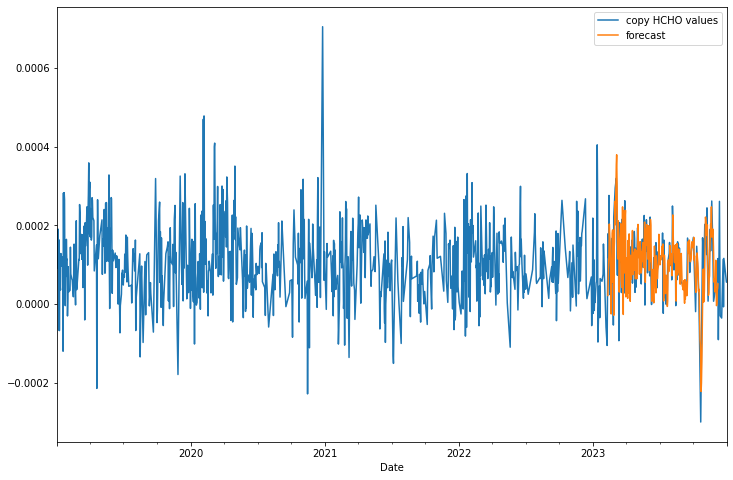

In [266]:
Kandy_df['forecast']=results.predict(start=1500,end=1800)
Kandy_df[['copy HCHO values','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

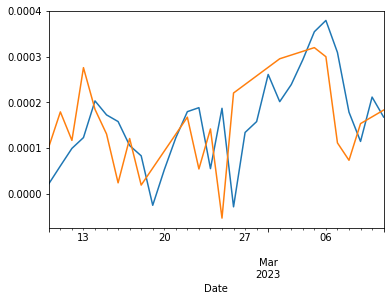

In [267]:
Kandy_df['forecast'][1500:1530].plot()
Kandy_df['copy HCHO values'][1500:1530].plot()

In [268]:
Kandy_df['copy HCHO values'][1500:1507]

Date
2023-02-10    0.000103
2023-02-11    0.000179
2023-02-12    0.000117
2023-02-13    0.000276
2023-02-14    0.000185
2023-02-15    0.000131
2023-02-16    0.000024
Name: copy HCHO values, dtype: float64

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


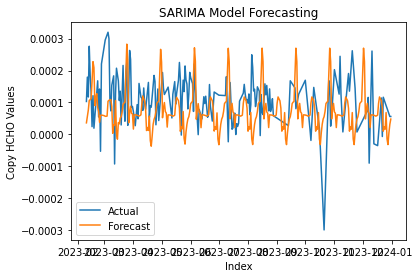

In [301]:
# s arima model for Kandy_df['copy HCHO values']

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting the data into training and testing sets
train = Kandy_df['copy HCHO values'][:1500]
test = Kandy_df['copy HCHO values'][1500:]

# Fitting the SARIMA model
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 1, 1, 36))
model = model.fit()

# Forecasting the values
forecast = model.predict(start=1500,end=1824,dynamic=True)

# Plotting the results
plt.plot(Kandy_df['copy HCHO values'][1500:], label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Index')
plt.ylabel('Copy HCHO Values')
plt.title('SARIMA Model Forecasting')
plt.legend()
plt.show()


<AxesSubplot:xlabel='Date'>

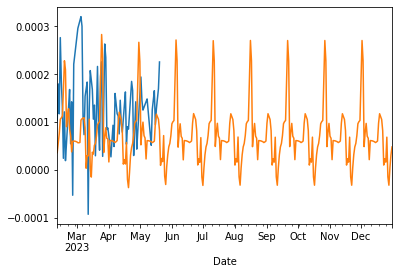

In [304]:
Kandy_df['copy HCHO values'][1500:1600].plot()
forecast.plot()

In [305]:
Kandy_df

,HCHO Value,copy HCHO values,forecast
Date,,,
2019-01-02,0.000092,0.000092,NaN
2019-01-03,NaN,0.000142,NaN
2019-01-04,0.000191,0.000191,NaN
2019-01-05,0.000122,0.000122,NaN
2019-01-06,-0.000065,-0.000065,NaN
...,...,...,...
2023-12-27,NaN,0.000082,NaN
2023-12-28,NaN,0.000073,NaN
2023-12-29,NaN,0.000065,NaN


In [306]:
#remove forecast column
Kandy_df = Kandy_df.drop(['forecast'], axis=1)


In [354]:
#difference copy HCHO values by 1
Kandy_df['copy HCHO values'] = Kandy_df['copy HCHO values'].diff(2)




In [355]:
Kandy_df

,HCHO Value,copy HCHO values,diff copy HCHO values
Date,,,
2019-01-02,0.000092,NaN,NaN
2019-01-03,NaN,NaN,0.000049
2019-01-04,0.000191,NaN,0.000049
2019-01-05,0.000122,-1.182486e-04,-0.000069
2019-01-06,-0.000065,-2.364248e-04,-0.000187
...,...,...,...
2023-12-27,NaN,0.000000e+00,-0.000009
2023-12-28,NaN,-1.355253e-20,-0.000009
2023-12-29,NaN,0.000000e+00,-0.000009


<AxesSubplot:xlabel='Date'>

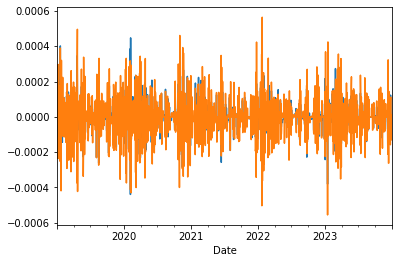

In [356]:
Kandy_df['diff copy HCHO values'].plot()
Kandy_df['copy HCHO values'].plot()


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


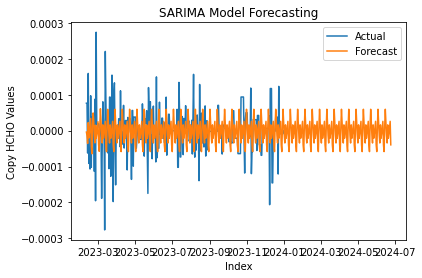

In [357]:
# s arima model for Kandy_df['copy HCHO values']

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting the data into training and testing sets
train = Kandy_df['diff copy HCHO values'][:1500]
test = Kandy_df['diff copy HCHO values'][1500:]

# Fitting the SARIMA model
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
model = model.fit()

# Forecasting the values
forecast = model.predict(start=1500,end=2000,dynamic=True)

# Plotting the results
plt.plot(Kandy_df['diff copy HCHO values'][1500:], label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Index')
plt.ylabel('Copy HCHO Values')
plt.title('SARIMA Model Forecasting')
plt.legend()
plt.show()


In [358]:
Kandy_df['diff copy HCHO values'][1500:]

Date
2023-02-10    0.000076
2023-02-11    0.000076
2023-02-12   -0.000062
2023-02-13    0.000159
2023-02-14   -0.000091
                ...   
2023-12-27   -0.000009
2023-12-28   -0.000009
2023-12-29   -0.000009
2023-12-30   -0.000009
2023-12-31    0.000000
Name: diff copy HCHO values, Length: 325, dtype: float64

In [359]:
forecast

2023-02-10   -0.000004
2023-02-11   -0.000014
2023-02-12   -0.000036
2023-02-13    0.000022
2023-02-14   -0.000020
                ...   
2024-06-20   -0.000021
2024-06-21   -0.000009
2024-06-22    0.000009
2024-06-23    0.000026
2024-06-24   -0.000040
Freq: D, Name: predicted_mean, Length: 501, dtype: float64

In [360]:
# Calculating the RMSE and check wheather a model good or bad with an if statement
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

if rmse < 0.5:
    print('Good Model')
else:
    print('Bad Model')



ValueError: Found input variables with inconsistent numbers of samples: [325, 501]

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


TypeError: float() argument must be a string or a number, not 'PredictionResultsWrapper'

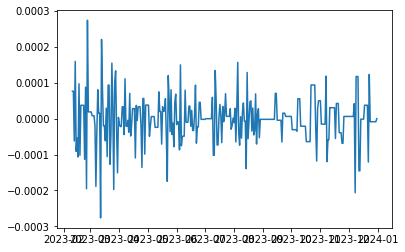

In [361]:
# s arima model for Kandy_df['copy HCHO values']

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting the data into training and testing sets
train = Kandy_df['diff copy HCHO values'][:1500]
test = Kandy_df['diff copy HCHO values'][1500:]

# Fitting the SARIMA model
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
model = model.fit()

# Forecasting the values
forecast = model.get_forecast(steps=324)

# Plotting the results
plt.plot(Kandy_df['diff copy HCHO values'][1500:], label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Index')
plt.ylabel('Copy HCHO Values')
plt.title('SARIMA Model Forecasting')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

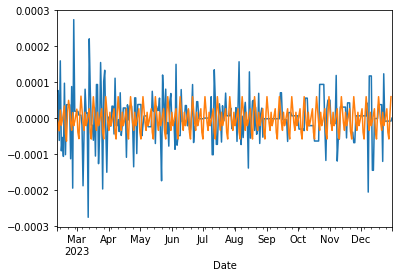

In [362]:
Kandy_df['diff copy HCHO values'][1500:].plot()
forecast.predicted_mean.plot()